<a href="https://colab.research.google.com/github/Dabii19/CFE-IA-E5/blob/main/ClasificacionMedica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data.csv')


print (df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

/tmp/ipython-input-1839422646.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})


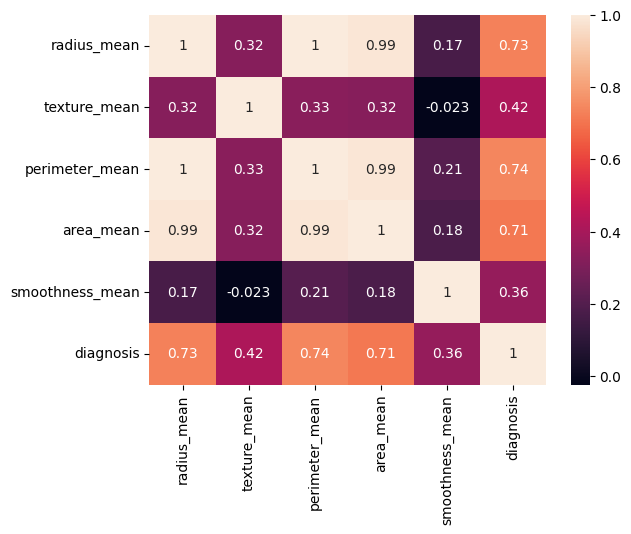

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']

df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})

sns.heatmap(df[cols].corr(), annot = True)
plt.show()

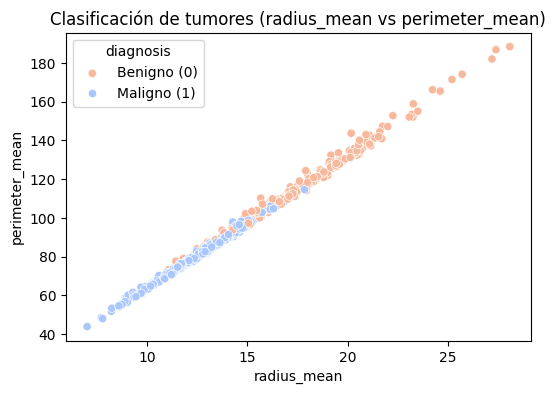

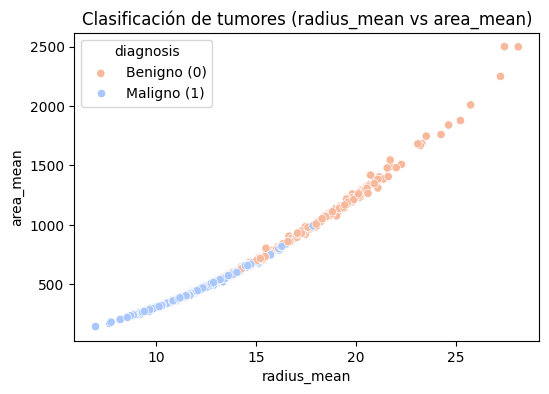

In [30]:
import matplotlib.pyplot as plt
import seaborn as sb

# Gráfico 1: radius_mean vs perimeter_mean
plt.figure(figsize=(6,4))
sb.scatterplot(
    data=df,
    x="radius_mean",
    y="perimeter_mean",
    hue="diagnosis",
    palette="coolwarm"
)
plt.title("Clasificación de tumores (radius_mean vs perimeter_mean)")
plt.xlabel("radius_mean")
plt.ylabel("perimeter_mean")
plt.legend(title="diagnosis", labels=["Benigno (0)", "Maligno (1)"])
plt.show()

# Gráfico 2: radius_mean vs area_mean
plt.figure(figsize=(6,4))
sb.scatterplot(
    data=df,
    x="radius_mean",
    y="area_mean",
    hue="diagnosis",
    palette="coolwarm"
)
plt.title("Clasificación de tumores (radius_mean vs area_mean)")
plt.xlabel("radius_mean")
plt.ylabel("area_mean")
plt.legend(title="diagnosis", labels=["Benigno (0)", "Maligno (1)"])
plt.show()

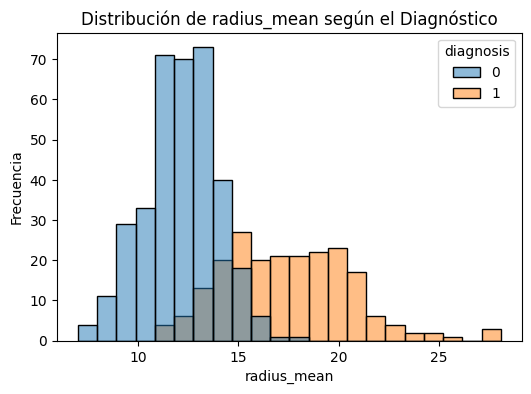

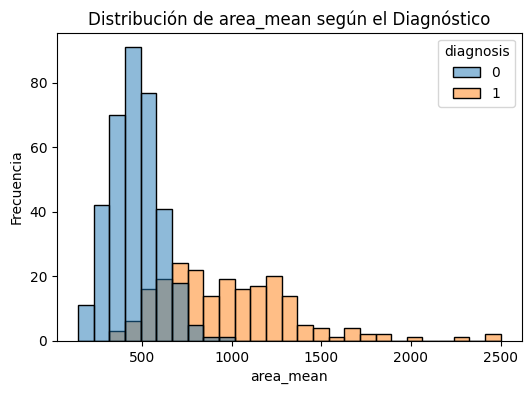

In [31]:
import matplotlib.pyplot as plt
import seaborn as sb

# Histograma 1: radius_mean según diagnosis
plt.figure(figsize=(6,4))
sb.histplot(
    data=df,
    x="radius_mean",
    hue="diagnosis",
)
plt.title("Distribución de radius_mean según el Diagnóstico")
plt.xlabel("radius_mean")
plt.ylabel("Frecuencia")
plt.show()

# Histograma 2: area_mean según diagnosis
plt.figure(figsize=(6,4))
sb.histplot(
    data=df,
    x="area_mean",
    hue="diagnosis",
)
plt.title("Distribución de area_mean según el Diagnóstico")
plt.xlabel("area_mean")
plt.ylabel("Frecuencia")
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df[['radius_mean', 'perimeter_mean', 'area_mean']]
#x = df.drop(columns = ['species'])

y = df['diagnosis']

scaler = StandardScaler()

XScaled = scaler.fit_transform(X)

kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(XScaled, y)

KNeighborsClassifier(n_neighbors=3)

In [38]:
input = [[20.0, 130.0, 1200.0]] #radius_mean, perimeter_mean, area_mean
inputScaler = scaler.transform(input)
output = kn.predict(inputScaler)

print("El diagnóstico es:", output[0])

#Caso 1: valores bajos [[12.5, 80.0, 500.0]] con estos valores el resultado fue 0

# Caso 2: valores altos [[20.0, 130.0, 1200.0]] con estos valores fue 1

El diagnóstico es: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
